

# 1.Objective


The main goal of this project is to accomplish several important tasks.
 First, we hope to answer questions about the data by conducting hypothesis testing. This will help us gain meaningful insights and draw conclusions from the information we have.

Second, we want to identify any flaws or problems in the data. By scrutinizing the dataset, we will be able to identify and resolve any inconsistencies or errors and ensure that our analysis is based on reliable, accurate data.

Once the data has been cleaned and validated, we will move on to the data analysis phase. This involves exploring the dataset for patterns, trends, and relationships that can provide valuable insights. By better understanding the data, we can make informed decisions and uncover important findings.

Finally, we aim to build the best predictive models using KNN classifiers.


# 2.Dataset overview

In [1]:
!pip install pandas
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler










df_loan_overview = pd.read_csv('Loan_Default.csv', index_col='ID')
print(df_loan_overview)

df_loan_overview.shape



        year loan_limit             Gender approv_in_adv loan_type  \
ID                                                                   
24890   2019         cf  Sex Not Available         nopre     type1   
24891   2019         cf               Male         nopre     type2   
24892   2019         cf               Male           pre     type1   
24893   2019         cf               Male         nopre     type1   
24894   2019         cf              Joint           pre     type1   
...      ...        ...                ...           ...       ...   
173555  2019         cf  Sex Not Available         nopre     type1   
173556  2019         cf               Male         nopre     type1   
173557  2019         cf               Male         nopre     type1   
173558  2019         cf             Female         nopre     type1   
173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
ID           

(148670, 33)

In [3]:
##df_loan_overview = df_loan_overview.dropna()
df_loan_overview.shape

df_2019_avg_interst_rate = df_loan_overview.groupby(['year'])['rate_of_interest'].mean().iloc[0]
##rslt_2019_df = df_loan_overview[df_loan_overview['year'] ==2019]
##df_loan_overview["rate_of_interest"].mean()=df_2019_avg_interst_rate

df_loan_overview["rate_of_interest"]=df_loan_overview["rate_of_interest"].fillna(df_2019_avg_interst_rate)

In [4]:
df_loan_overview.head()

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
ID,,,,,,,,,,,,,,,,,,,,,
24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df_loan_overview.head()["rate_of_interest"]

ID
24890    4.045476
24891    4.045476
24892    4.560000
24893    4.250000
24894    4.000000
Name: rate_of_interest, dtype: float64

In [6]:
#Full parameters list
print(list(df_loan_overview.columns))

#Dropping the year column as it's not representative (all 2019)
df_loan_overview.drop(['year'],axis=1,inplace=True)


['year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']


#3.Hypothesis Testing and Visualizations

In [7]:

# Is there a significant difference between the different age groups when it comes to loan status ?

## How many Age groups do we have?
print(df_loan_overview['age'].unique())
print("\n")
#Noticing a nan value, how many null values do we have ?
print("The number of missing 'age' rows: "+str(df_loan_overview['age'].isnull().sum()))

['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]


The number of missing 'age' rows: 200


In [8]:
#The next Step is to drop the the nude column from the data sets since it takes place a small amount of the column from the total
loan_data_fullage=df_loan_overview.dropna(subset=["age"])
print(loan_data_fullage.shape)

(148470, 32)


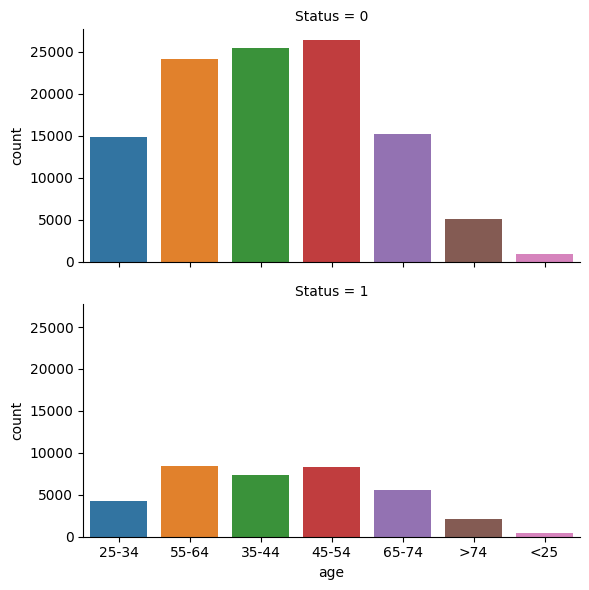

In [9]:
sns.catplot(x='age', row = 'Status',
            kind='count', data=loan_data_fullage,
            height = 3, aspect = 2)
plt.show()

**Observation**: From the chart we can get that the over shape and the trends of the loan status ( fulfill or unfulfill ) does not change a lot which means the age is the key factors of the loan status. What's more, we can also see the distribution of the loan data from the group of **25-34**, **55-64**, **35-44**, **45-54**, **65-74**, **> 74**,and **< 25**.

Moreover, ***loan fulfilment is more common in certain age groups***, whereas loan non-fulfillment is more common in others. This implies that age may be a crucial determinant in whether or not a loan is fulfilled, and we should investigate further to determine why.

To see if there is a statistically significant difference in loan fulfilment between these groups, we should use a **Chi2** test that adjusts for sample size disparities.

The **Chi2 squared test** can be useful for testing the association between two categorical variables

**H0**: There is no significant difference between the different **age groups** when it comes to loan status

**H1**: There is a significant difference between the different **age groups** when it comes to loan status

Chosen Alpha Value : 0.05

In [10]:
# Contingency Data Table
cont_table  = pd.crosstab(loan_data_fullage['age'], loan_data_fullage['Status'])
cont_table

Status,0,1
age,,
25-34,14894,4248
35-44,25509,7309
45-54,26371,8349
55-64,24112,8422
65-74,15173,5571
<25,950,387
>74,5022,2153


In [11]:
#Computing P value
_,p,_,expected=scipy.stats.chi2_contingency(cont_table, correction = True)
print("The obtained P-Value is: "+str(p))
print("\n")
print("The expected frequencies are: ")
expected_df=pd.DataFrame(expected)
expected_df.columns=cont_table.columns
expected_df.index=cont_table.index
expected_df

The obtained P-Value is: 8.442234122939632e-78


The expected frequencies are: 


Status,0,1
age,,
25-34,14443.977921,4698.022079
35-44,24763.476514,8054.523486
45-54,26198.668553,8521.331447
55-64,24549.178649,7984.821351
65-74,15652.798976,5091.201024
<25,1008.860019,328.139981
>74,5414.039368,1760.960632


**Conclusion**: Since the p-value is considerably lower than our chosen level of significance (alpha value--0.05), we reject the null hypothesis because there is sufficient evidence of an association between age and loan status.

**Next, we wonder whether there is the huge diffenrences in loan status based on gender**

In [12]:
df_loan_overview.Gender.value_counts()


Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

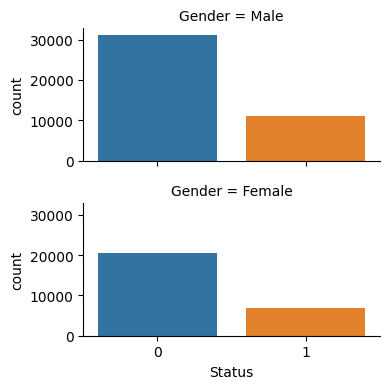

In [14]:
loan_per_gender=df_loan_overview[(df_loan_overview.Gender=="Female") | (df_loan_overview.Gender=="Male")]
sns.catplot(x='Status', row = 'Gender',
            kind='count', data=loan_per_gender,
            height = 2, aspect = 2)
plt.show()

We cannot really tell from the figure whether there is a statistical difference between the two genders in terms of loan fulfillment status because we do not have the same number of gender samples. We can use the same test to examine the association between gender and loan status.

Applying The Chi2 squared test

H0: There is no significant difference in loan status based on gender

H1: There is a significant difference in loan status based on gender

Chosen Significance Level : 0.05

In [15]:
cont_table2=pd.crosstab(loan_per_gender.Gender,loan_per_gender.Status)
cont_table2

Status,0,1
Gender,,
Female,20418,6848
Male,31255,11091


In [16]:
_,p2,_,expected2=scipy.stats.chi2_contingency(cont_table2, correction = True)
expected2=pd.DataFrame(expected2,index=cont_table2.index)
expected2.columns=cont_table2.columns
print("The P_value obtained from this test is: "+str(p2))
expected2

The P_value obtained from this test is: 0.0015827031471534522


Status,0,1
Gender,,
Female,20239.556657,7026.443343
Male,31433.443343,10912.556657


**Conclusion**:Since the P-value is less than the signficance level (alpha Value) that we have chosen, then we reject the Null hypothesis as there is enough proof that there is an association between the GENDER and the loan STATUS.

**What it is the probability of obtaining a Loan-to-Value (LTV) ratio greater than 100% for loans that are not repaid ?**

How frequently does a client asks for an amount of money greater than the property value ?

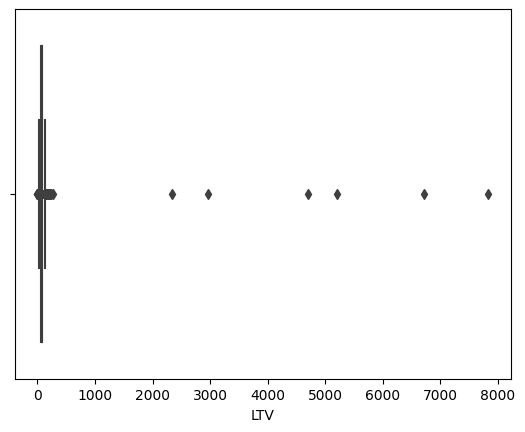

In [18]:
sns.boxplot(x="LTV", data=df_loan_overview)
plt.show()
#Well, there is a problem

The main cause of the problem can be attributed to outliers. Since the Loan-to-Value (LTV) ratio represents a percentage, the values should ideally fall between 0 and 1. The LTV is calculated by dividing the loan amount by the property value. However, it is possible for the LTV to exceed 1 slightly if the loan amount surpasses the property value.

In [19]:
# one of the outliers
print(df_loan_overview.LTV.max())

df_loan_overview[['property_value','loan_amount','LTV']][df_loan_overview.LTV>1000]
#1000 as a test value

7831.25


,property_value,loan_amount,LTV
ID,,,
41841,8000.0,626500,7831.25
71177,8000.0,236500,2956.25
72697,8000.0,416500,5206.25
80176,8000.0,536500,6706.25
90128,8000.0,376500,4706.25
148233,8000.0,186500,2331.25


The value 8000 is systematically repeated when the LTV value is odd, suggesting that the missing values in the "property_value" column have been inputted intentionally. In other words, 8000 represents an initially missing value.



In [20]:
odd_df=df_loan_overview[['property_value','loan_amount','LTV']][df_loan_overview.property_value==8000.0]
odd_df

,property_value,loan_amount,LTV
ID,,,
41841,8000.0,626500,7831.25
71177,8000.0,236500,2956.25
72697,8000.0,416500,5206.25
80176,8000.0,536500,6706.25
90128,8000.0,376500,4706.25
148233,8000.0,186500,2331.25


To solve this problem, we have a couple of options. One option is to replace these missing property values using the **imputation method** of our choice and then recalculate LTVs using the estimated values.Alternatively, given that these rows represent only a small portion of the overall data, we could choose to drop these rows altogether.

Given the small percentage of affected rows in the dataset, it may be more prudent to simply **remove** them from further analysis (which could be considered part of the data cleanup component).

In [21]:
odd_indexes=odd_df.index
odd_indexes

Int64Index([41841, 71177, 72697, 80176, 90128, 148233], dtype='int64', name='ID')

In [22]:
odd_indexes=odd_df.index
print(df_loan_overview.shape)
odd_indexes=list(odd_df.index)
df_loan_overview.drop(index=odd_indexes,inplace=True)
print(df_loan_overview.shape)

(148670, 32)
(148664, 32)


To create the boxplot and calculate the correspoding sample mean, sample median, and standard deviation

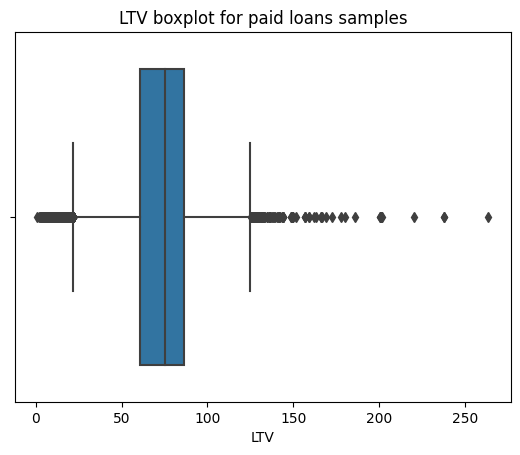

In [23]:
sns.boxplot(x="LTV", data=df_loan_overview)
plt.title("LTV boxplot for paid loans samples")
plt.show()

In [24]:
loan_mean = round(df_loan_overview['LTV'][df_loan_overview.Status==0].mean(), 3)
loan_sd = round(df_loan_overview['LTV'][df_loan_overview.Status==0].std(), 3)

prob0 = scipy.stats.norm.cdf((100 - loan_mean)/loan_sd)
prob=1-prob0
print(prob)

0.06377589719967247


**Conclusion**: Given that the probability of getting an LTV ratio more than 100% is low (for non fulfilled cases), even if it represents a high-risk authorization, it would be advisable for the loan lender to keep offering this kind of service

# 4.Data Cleaning




In [25]:
df_loan_overview.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amount,148664.0,331115.105204,183909.937139,16500.000000,196500.00000,296500.000000,436500.000000,3.576500e+06
rate_of_interest,148664.0,4.045485,0.487771,0.000000,3.75000,4.045476,4.250000,8.000000e+00
Interest_rate_spread,112026.0,0.441634,0.513040,-3.638000,0.07600,0.390300,0.775375,3.357000e+00
Upfront_charges,109023.0,3225.144031,3251.122700,0.000000,581.86000,2596.760000,4812.500000,6.000000e+04
term,148623.0,335.135578,58.410049,96.000000,360.00000,360.000000,360.000000,3.600000e+02
property_value,133566.0,497915.472500,359928.422921,18000.000000,268000.00000,418000.000000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.000000,8520.000000,5.785800e+05
Credit_Score,148664.0,699.790945,115.875971,500.000000,599.00000,699.000000,800.000000,9.000000e+02
LTV,133566.0,72.527082,18.942534,0.967478,60.47486,75.135870,86.184211,2.635417e+02
Status,148664.0,0.246448,0.430944,0.000000,0.00000,0.000000,0.000000,1.000000e+00


In [26]:
continious_cols=[col for col in df_loan_overview.columns if df_loan_overview[col].dtype == "float64"]
print(continious_cols)
df_loan_overview[continious_cols]

['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']


,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1
ID,,,,,,,,
24890,4.045476,NaN,NaN,360.0,118000.0,1740.0,98.728814,45.0
24891,4.045476,NaN,NaN,360.0,NaN,4980.0,NaN,NaN
24892,4.560000,0.2000,595.00,360.0,508000.0,9480.0,80.019685,46.0
24893,4.250000,0.6810,NaN,360.0,658000.0,11880.0,69.376900,42.0
24894,4.000000,0.3042,0.00,360.0,758000.0,10440.0,91.886544,39.0
...,...,...,...,...,...,...,...,...
173555,3.125000,0.2571,9960.00,180.0,608000.0,7860.0,71.792763,48.0
173556,5.190000,0.8544,0.00,360.0,788000.0,7140.0,74.428934,15.0
173557,3.125000,0.0816,1226.64,180.0,728000.0,6900.0,61.332418,49.0


['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']

The code generates a **2x4 grid of histograms**, visualizing the **distributions** of data from different columns in the df_loan_overview DataFrame using Seaborn's **histplot function**.

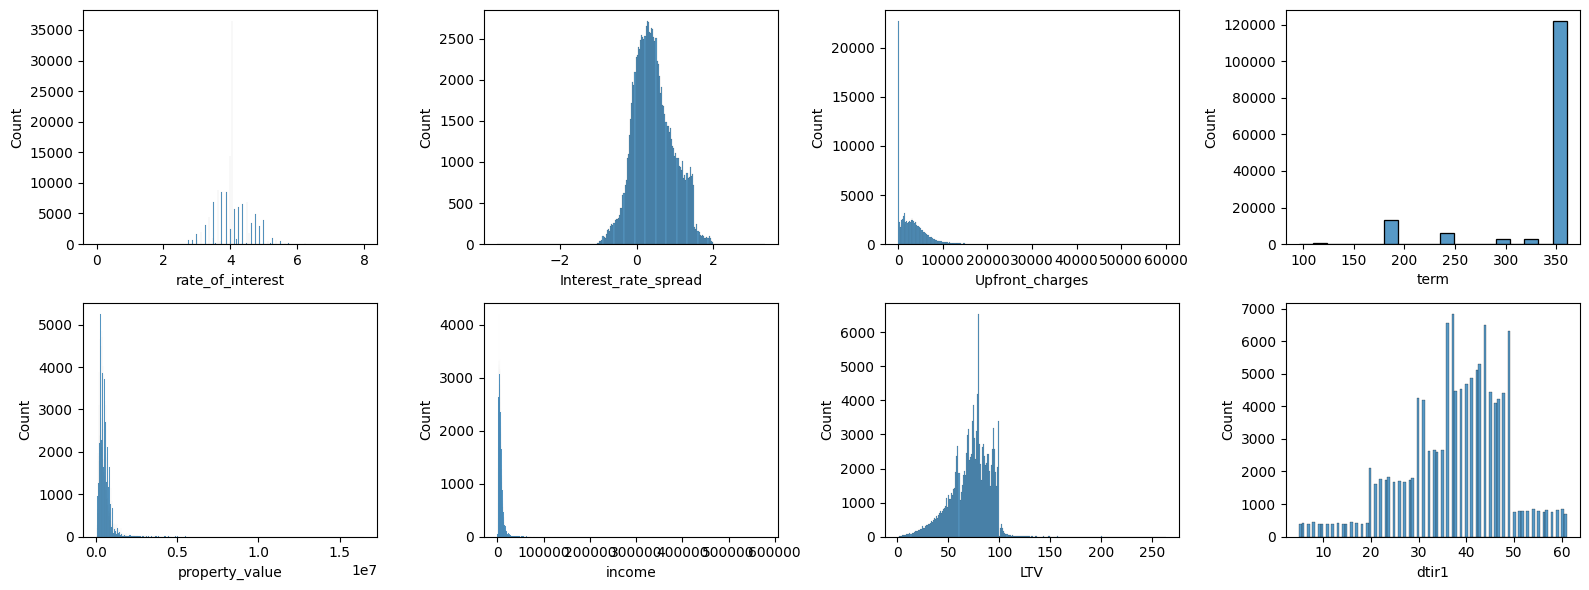

In [27]:
indexes=[]
for i in range(2):
    for j in range(4):
        indexes.append([i,j])
# Create a figure with a single row and multiple columns
fig, axes = plt.subplots(ncols=4,nrows=2,figsize=(16, 6))

for l in range(len(continious_cols)):
    sns.histplot(data=df_loan_overview,x=str(continious_cols[l]),ax=axes[indexes[l][0],indexes[l][1]])

plt.tight_layout()
plt.show()

**Observation**: We have observed the presence of numerous outliers in the dataset. **Scaling** these numerical values will help reduce the impact of these outliers on the **KNN model'**s performance. We will also address missing values through imputation using the "**median**" strategy for continuous variables and the "**most frequent**" strategy for discrete variables. Since the term variable is a categorical variable, it will be excluded from the list of continuous variables

In [28]:
# Splitting the data
y=df_loan_overview['Status']
X=df_loan_overview.drop(['Status'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

**Note**:Prior to processing the data, it is crucial to perform a data split in order to ensure that the test set remains entirely independent of the training set, particularly with regards to missing values and other factors. This separation helps maintain the integrity of the evaluation process and ensures a fair assessment of the model's performance.



**Missing value**

In [29]:
#REPLACING MISSING NUMERICAL VALUES WITH THE COLUMN MEDIAN
num_cols=[col for col in X_train.columns if X_train[col].dtype in ["float64","int8","int64"]]
num_cols.remove('term')
my_imputer = SimpleImputer(strategy="median")
train_imputed_loan_data_num = pd.DataFrame(my_imputer.fit_transform(X_train[num_cols]))
test_imputed_loan_data_num = pd.DataFrame(my_imputer.transform(X_test[num_cols]))

#Checking presence of null values
print(train_imputed_loan_data_num.isnull().any().any())
print(test_imputed_loan_data_num.isnull().any().any())


False
False


In [31]:
#'TERM' FEATURE
my_imputer2 = SimpleImputer(strategy="most_frequent")
train_imputed_term=pd.DataFrame(my_imputer2.fit_transform(np.array(X_train['term']).reshape(-1,1)))
test_imputed_term=pd.DataFrame(my_imputer2.transform(np.array(X_test['term']).reshape(-1,1)))

train_imputed_term.columns=['term']
test_imputed_term.columns=['term']

print(pd.DataFrame(train_imputed_term).isnull().any())
print(pd.DataFrame(test_imputed_term).isnull().any())

term    False
dtype: bool
term    False
dtype: bool


In [33]:
#REPLACING MISSING CATEGORICAL VALUES WITH THE MOST FREQUENT VALUE
cat_cols=[col for col in df_loan_overview.columns if df_loan_overview[col].dtype =="object"]

train_imputed_loan_data_cat = pd.DataFrame(my_imputer2.fit_transform(X_train[cat_cols]))
test_imputed_loan_data_cat = pd.DataFrame(my_imputer2.transform(X_test[cat_cols]))

train_imputed_loan_data_cat.columns=cat_cols
test_imputed_loan_data_cat.columns=cat_cols

train_imputed_loan_data_cat=train_imputed_loan_data_cat.join(train_imputed_term)
test_imputed_loan_data_cat=test_imputed_loan_data_cat.join(test_imputed_term)

In [34]:
df_loan_overview[df_loan_overview['Gender']=='Sex Not Available'].shape
#Too many rows with 'Sex Not Available' as 'Gender' value,37659 rows, which representes a lot of data.
#filling these "empty" cells with the most frequent value can lead the model to severe mistakes, so I leave it as it is

(37659, 32)

When encoding **categorical features**, we have two options: **ordinal** encoding and one-hot encoding. The choice between them depends on the nature of the feature. If a feature does not possess any inherent order or hierarchy among its categories, we should choose one-hot encoding. On the other hand, if a feature exhibits a meaningful order or hierarchy among its categories, we should opt for ordinal encoding.

**Categorical Encoding**

In [35]:
#Separating categorical features
one_hot_encoding_features = [
    'Gender',
    'loan_type',
    'loan_purpose',
    'business_or_commercial',
    'construction_type',
    'occupancy_type',
    'Secured_by',
    'credit_type',
    'co-applicant_credit_type',
    'submission_of_application',
    'Region',
    'Security_Type'
]

ordinal_encoding_features = [
    'loan_limit',
    'Credit_Worthiness',
    'open_credit',
    'Neg_ammortization',
    'interest_only',
    'lump_sum_payment',
    'total_units','age',
    'term'
]


#One-hot Encoding
OHtrain_imputed_loan_data_cat=pd.get_dummies(train_imputed_loan_data_cat[one_hot_encoding_features])
OHtest_imputed_loan_data_cat=pd.get_dummies(test_imputed_loan_data_cat[one_hot_encoding_features])

#Ordinal
OREncoder=OrdinalEncoder()
ORtrain_imputed_loan_data_cat=pd.DataFrame(OREncoder.fit_transform(train_imputed_loan_data_cat[ordinal_encoding_features]))
ORtest_imputed_loan_data_cat=pd.DataFrame(OREncoder.transform(test_imputed_loan_data_cat[ordinal_encoding_features]))

ORtrain_imputed_loan_data_cat.columns=ordinal_encoding_features
ORtest_imputed_loan_data_cat.columns=ordinal_encoding_features

train_cat=ORtrain_imputed_loan_data_cat.join(OHtrain_imputed_loan_data_cat)
test_cat=ORtest_imputed_loan_data_cat.join(OHtest_imputed_loan_data_cat)
train_cat.head()

,loan_limit,Credit_Worthiness,open_credit,Neg_ammortization,interest_only,lump_sum_payment,total_units,age,term,Gender_Female,...,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,25.0,0,...,0,1,0,1,1,0,0,0,0,1
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,25.0,0,...,1,0,0,1,0,0,0,1,0,1
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,25.0,0,...,0,1,1,0,1,0,0,0,0,1
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,25.0,1,...,0,1,0,1,1,0,0,0,0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.0,0,...,0,1,1,0,1,0,0,0,0,1


**Data Scaling**

In [36]:
scaler = StandardScaler()
train_imputed_loan_data_num=pd.DataFrame(scaler.fit_transform(train_imputed_loan_data_num))
test_imputed_loan_data_num=pd.DataFrame(scaler.transform(test_imputed_loan_data_num))


train_imputed_loan_data_num.columns=num_cols
test_imputed_loan_data_num.columns=num_cols

# final train/test sets
train_data=train_imputed_loan_data_num.join(train_cat)
test_data=test_imputed_loan_data_num.join(test_cat)

**Data Balancing**

In [37]:
# Remarkable imbalance
y_train.value_counts()

0    83975
1    27523
Name: Status, dtype: int64

In [38]:
ROS=RandomOverSampler(sampling_strategy="not majority")
X_train,Y_train=ROS.fit_resample(train_data,y_train)
Y_train.value_counts()

0    83975
1    83975
Name: Status, dtype: int64

# 5.KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KnnPred=KNeighborsClassifier()
KnnPred.fit(X_train,Y_train)
y_preds=KnnPred.predict(test_data)
y_preds

array([1, 0, 1, ..., 1, 0, 0])

In [40]:
#Keeping the default parameters
KnnPred.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
print(accuracy_score(y_test,y_preds))
# Cross Val
scores = cross_val_score(KnnPred, X_train, Y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

0.886051767744713
Mean cross-validation score: 0.92


**Conclusion**: The modal have the KNN Score of **0.92** which is a successful model owing to the plenty of the Large amount of preprocessed data, here it is my first project in the loan default and hope to perfect in the future